In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg-dataset-for-adhd/adhdata.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Phase 1: Data Loading & Basic Exploration
import pandas as pd

# Load dataset
file_path = "adhdata.csv"
data = pd.read_csv(file_path)

# Show structure
print(data.info())
print(data.head())

# Class distribution
print(data["Class"].value_counts())

# Check for missing values
print(data.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166383 entries, 0 to 2166382
Data columns (total 21 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Fp1     float64
 1   Fp2     float64
 2   F3      float64
 3   F4      float64
 4   C3      float64
 5   C4      float64
 6   P3      float64
 7   P4      float64
 8   O1      float64
 9   O2      float64
 10  F7      float64
 11  F8      float64
 12  T7      float64
 13  T8      float64
 14  P7      float64
 15  P8      float64
 16  Fz      float64
 17  Cz      float64
 18  Pz      float64
 19  Class   object 
 20  ID      object 
dtypes: float64(19), object(2)
memory usage: 347.1+ MB
None
     Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  ...  \
0  261.0  402.0   16.0  261.0  126.0  384.0  126.0  236.0   52.0  236.0  ...   
1  121.0  191.0  -94.0   85.0   16.0  200.0  126.0   52.0  347.0  273.0  ...   
2  -55.0   85.0 -204.0   15.0  -57.0  200.0   52.0  126.0  236.0  200.0  ...   
3  191.0   85.0   52.0  

In [3]:
# Separate classes
adhd_data = data[data['Class'] == 'ADHD']
control_data = data[data['Class'] == 'Control']

# EEG channels (exclude Class and ID)
eeg_channels = data.columns[:-2]

In [ ]:
# 1. Plot EEG signal from a few random samples (ADHD vs Control)
plt.figure(figsize=(15, 6))
for i, ch in enumerate(eeg_channels[:4]):
    plt.subplot(2, 2, i + 1)
    plt.plot(adhd_data[ch].values[:1000], label='ADHD', alpha=0.7)
    plt.plot(control_data[ch].values[:1000], label='Control', alpha=0.7)
    plt.title(f"Channel: {ch}")
    plt.legend()
plt.suptitle("EEG Channel Comparison (First 1000 Samples)")
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

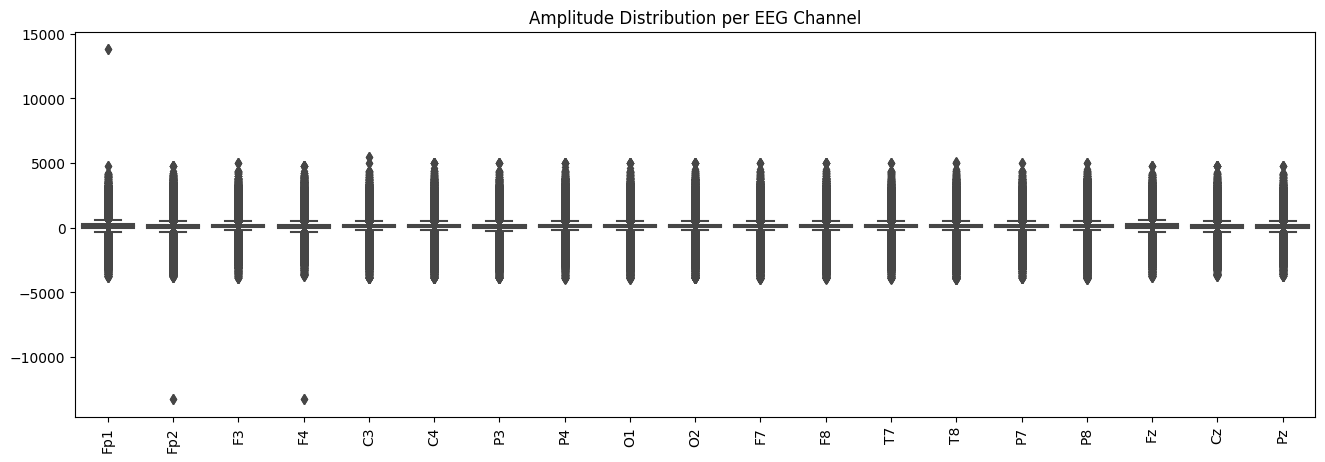

In [ ]:
# 3. Boxplots of channel-wise amplitudes (to spot outliers)
plt.figure(figsize=(16, 5))
sns.boxplot(data=data[eeg_channels])
plt.xticks(rotation=90)
plt.title("Amplitude Distribution per EEG Channel")
plt.show()

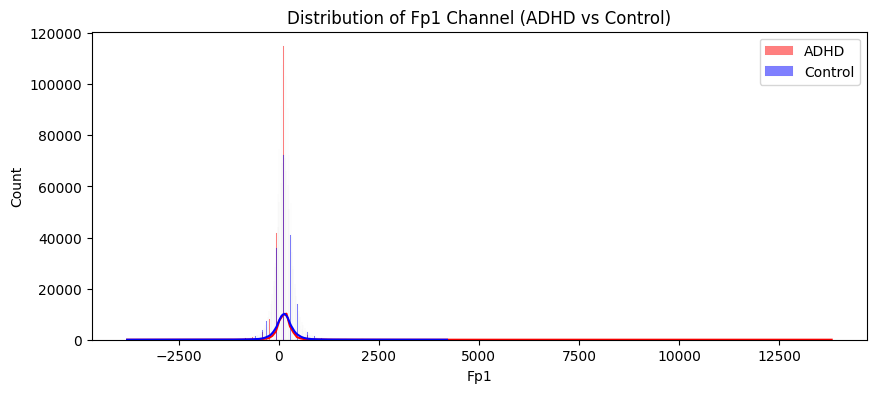

In [6]:
# 4. Distribution plot for one channel (say Fp1)
plt.figure(figsize=(10, 4))
sns.histplot(adhd_data["Fp1"], label="ADHD", color='red', kde=True)
sns.histplot(control_data["Fp1"], label="Control", color='blue', kde=True)
plt.title("Distribution of Fp1 Channel (ADHD vs Control)")
plt.legend()
plt.show()

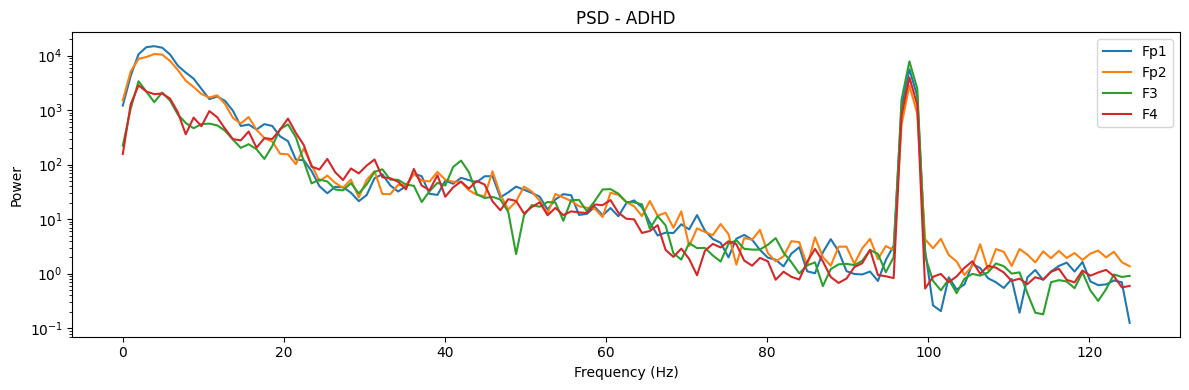

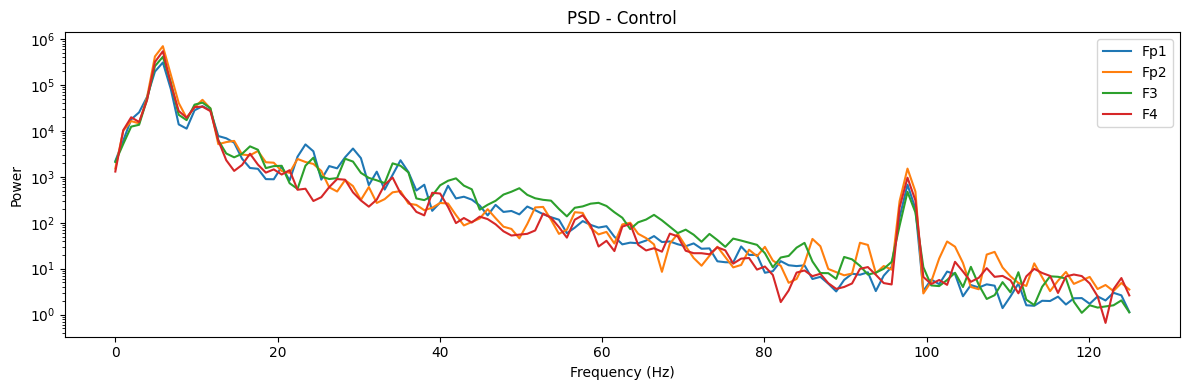

In [7]:
# 5. [Optional] Power Spectral Density (can be used for next phase)
from scipy.signal import welch

fs = 250  # assumed sampling rate (adjust if known)

def plot_psd(sample, label):
    plt.figure(figsize=(12, 4))
    for ch in eeg_channels[:4]:
        f, Pxx = welch(sample[ch][:1000], fs)
        plt.semilogy(f, Pxx, label=ch)
    plt.title(f"PSD - {label}")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_psd(adhd_data, "ADHD")
plot_psd(control_data, "Control")

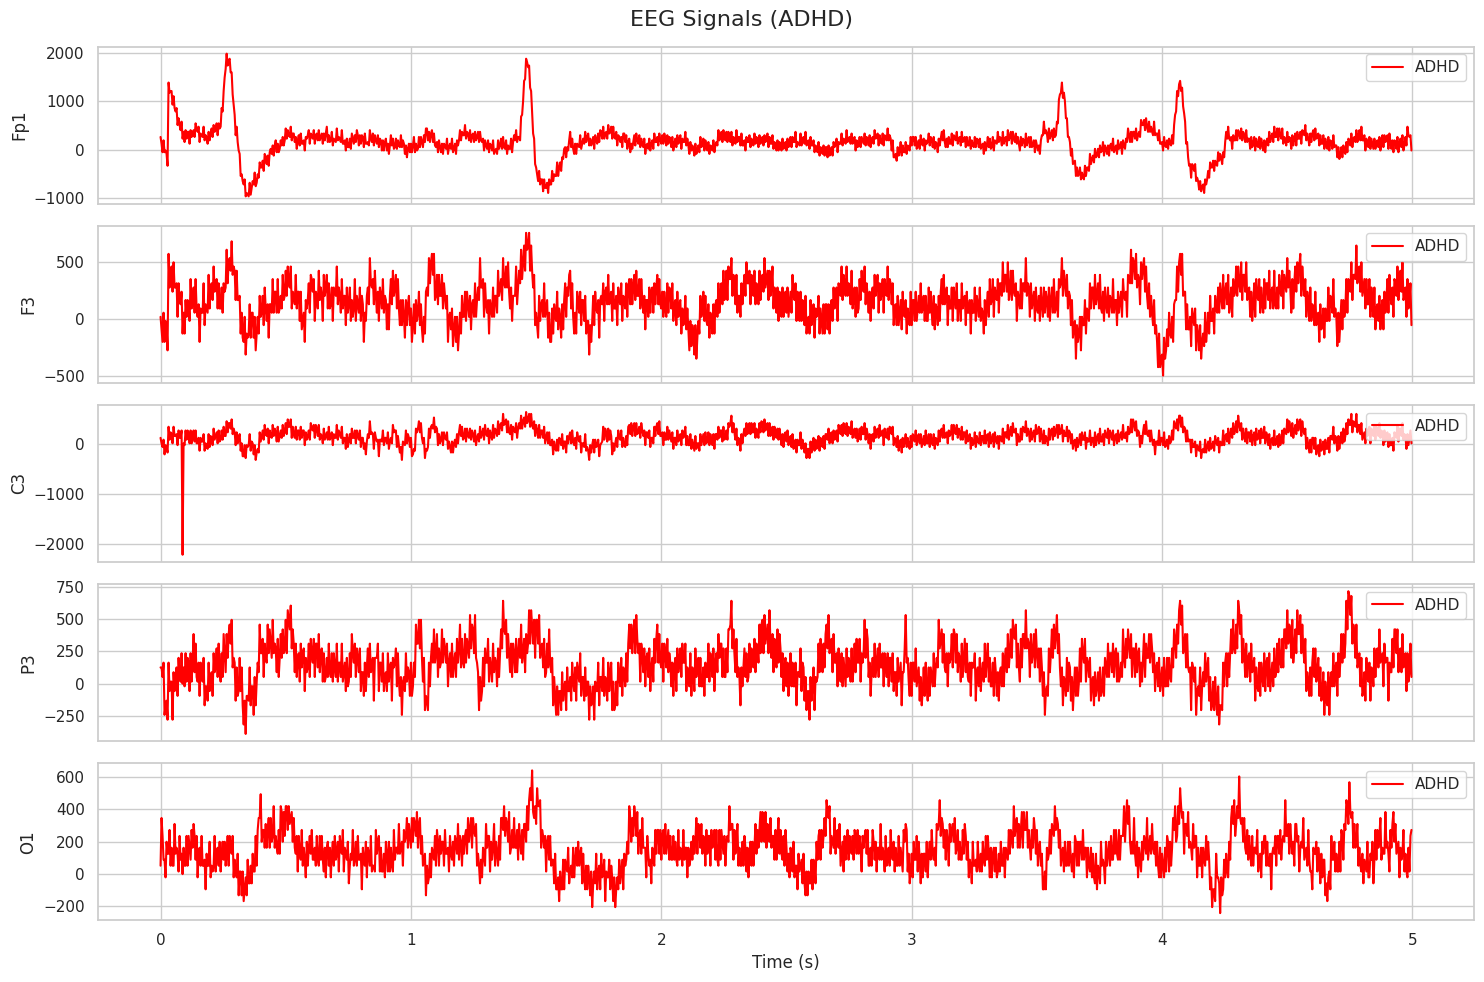

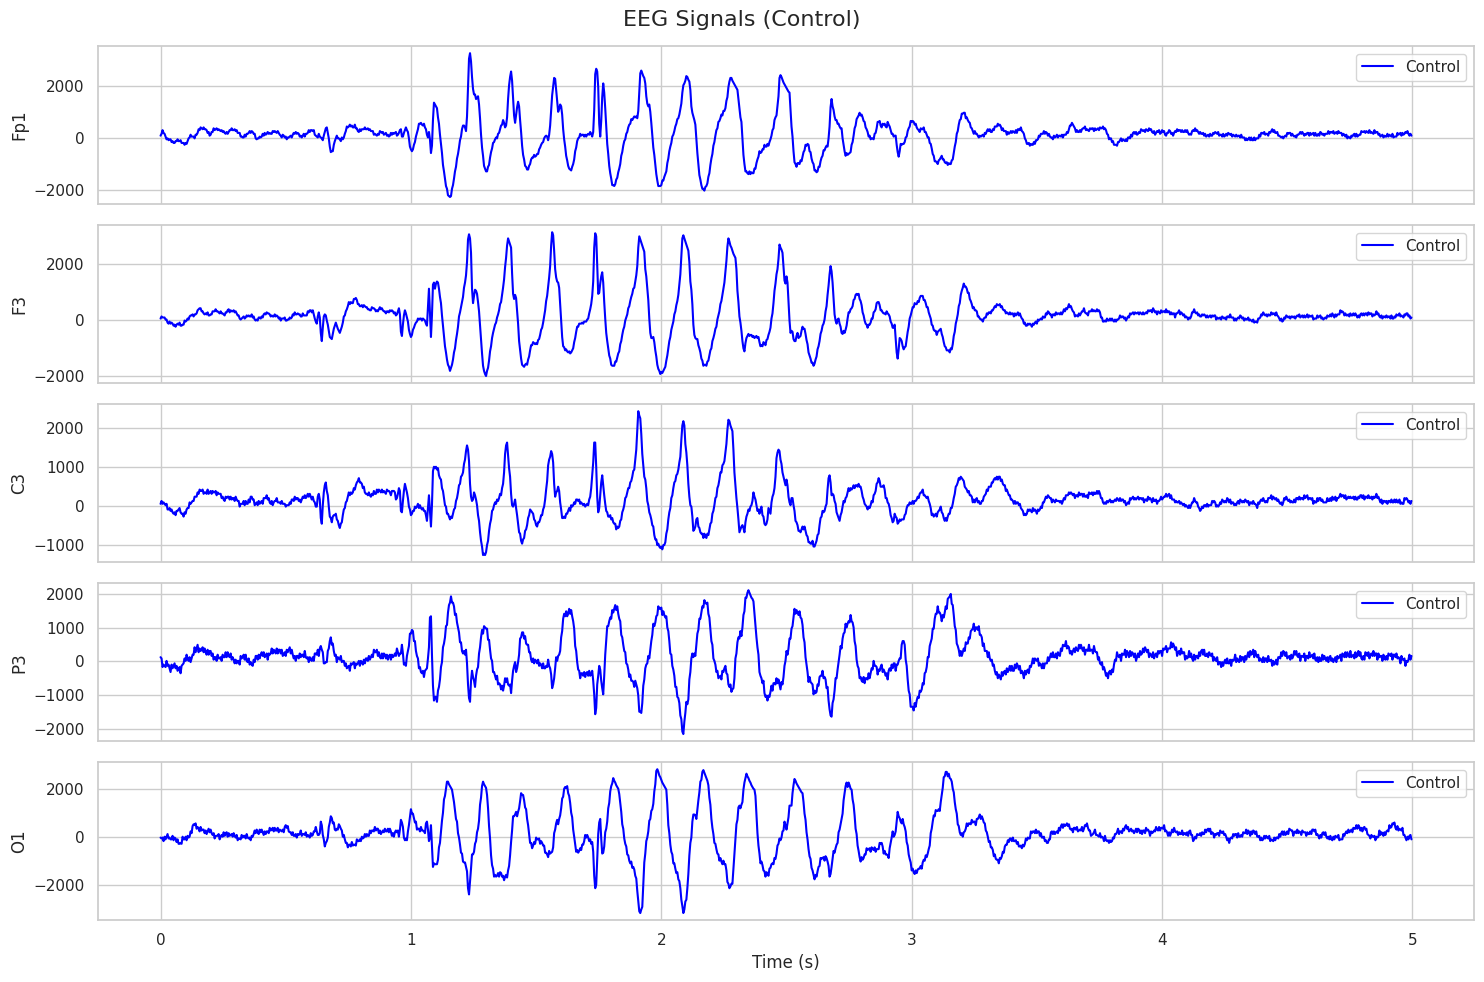

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (14, 5)

# Pick a subject/class (e.g., first few rows from each class)
adhd_data = data[data['Class'] == 'ADHD'].reset_index(drop=True)
control_data = data[data['Class'] == 'Control'].reset_index(drop=True)

# Pick EEG channels to visualize
channels_to_plot = ['Fp1', 'F3', 'C3', 'P3', 'O1']

# Duration (in seconds) to plot
duration_secs = 5
samples = fs * duration_secs

# Plot ADHD EEG signals
fig, axs = plt.subplots(len(channels_to_plot), 1, sharex=True, figsize=(15, 10))
for i, ch in enumerate(channels_to_plot):
    axs[i].plot(np.arange(samples) / fs, adhd_data[ch][:samples], label='ADHD', color='red')
    axs[i].set_ylabel(ch)
    axs[i].legend(loc='upper right')
axs[-1].set_xlabel('Time (s)')
fig.suptitle('EEG Signals (ADHD)', fontsize=16)
plt.tight_layout()
plt.show()

# Plot Control EEG signals
fig, axs = plt.subplots(len(channels_to_plot), 1, sharex=True, figsize=(15, 10))
for i, ch in enumerate(channels_to_plot):
    axs[i].plot(np.arange(samples) / fs, control_data[ch][:samples], label='Control', color='blue')
    axs[i].set_ylabel(ch)
    axs[i].legend(loc='upper right')
axs[-1].set_xlabel('Time (s)')
fig.suptitle('EEG Signals (Control)', fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np

# EEG channels
eeg_channels = data.columns[:-2]

# 1. Label Encode 'Class'
le = LabelEncoder()
data['Label'] = le.fit_transform(data['Class'])  # ADHD=0, Control=1

# 2. Normalize EEG data
scaler = MinMaxScaler()
data[eeg_channels] = scaler.fit_transform(data[eeg_channels])

# 3. Segmenting EEG into sequences
window_size = 1000  # You can tune this
stride = 500        # Overlapping window (optional)

X = []
y = []

for i in range(0, len(data) - window_size, stride):
    segment = data.iloc[i:i+window_size]
    
    # Ensure window is from same subject & class
    if segment['ID'].nunique() == 1:
        x_window = segment[eeg_channels].values
        label = segment['Label'].values[0]
        
        X.append(x_window)
        y.append(label)

X = np.array(X)  # Shape: (samples, window_size, channels)
y = np.array(y)

print("Final Data Shapes:")
print("X:", X.shape)  # Expected: (num_samples, time_steps, num_channels)
print("y:", y.shape)

Final Data Shapes:
X: (4091, 1000, 19)
y: (4091,)


In [10]:
# Check class balance
from collections import Counter
print("Class distribution:", Counter(y))

# Sample shape check
print(f"Sample shape: {X[0].shape} (Time steps x Channels)")

Class distribution: Counter({0: 2293, 1: 1798})
Sample shape: (1000, 19) (Time steps x Channels)


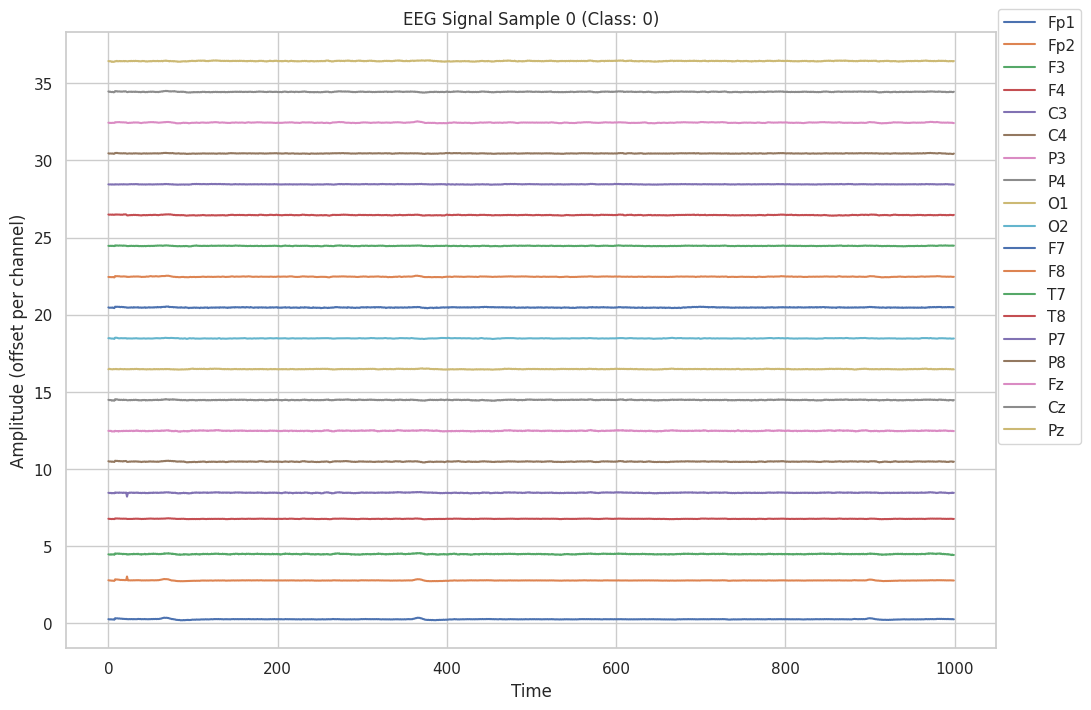

In [11]:
import matplotlib.pyplot as plt

def plot_sample_eeg(X, y, eeg_channels, sample_idx=0):
    plt.figure(figsize=(12, 8))
    for i in range(X.shape[2]):
        plt.plot(X[sample_idx, :, i] + i * 2, label=eeg_channels[i])  # Offset for visibility
    plt.title(f"EEG Signal Sample {sample_idx} (Class: {y[sample_idx]})")
    plt.xlabel("Time")
    plt.ylabel("Amplitude (offset per channel)")
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
    plt.grid(True)
    plt.show()

plot_sample_eeg(X, y, eeg_channels, sample_idx=0)


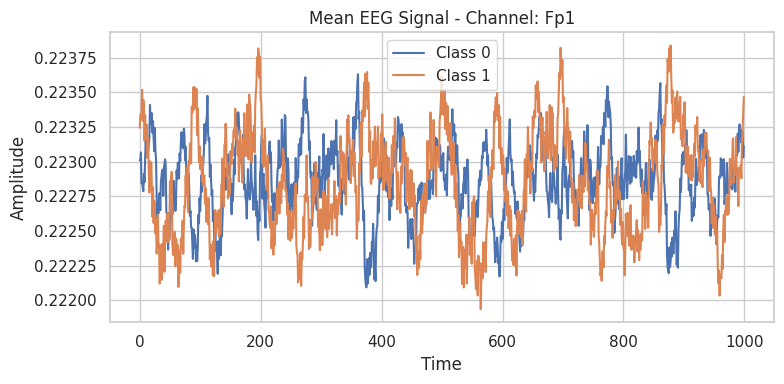

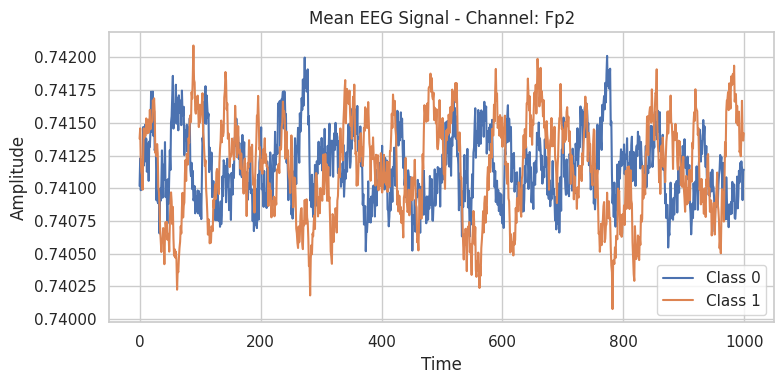

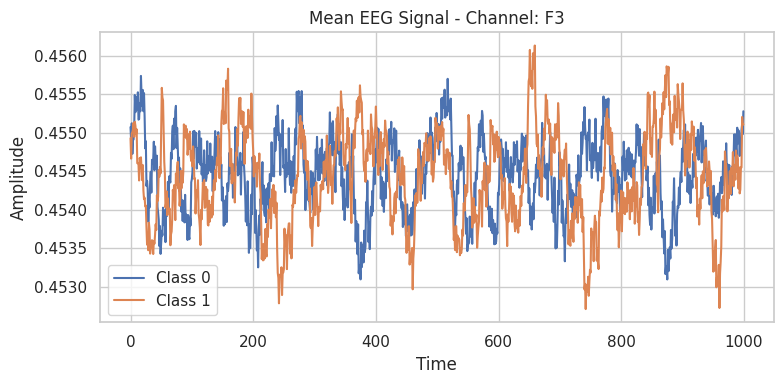

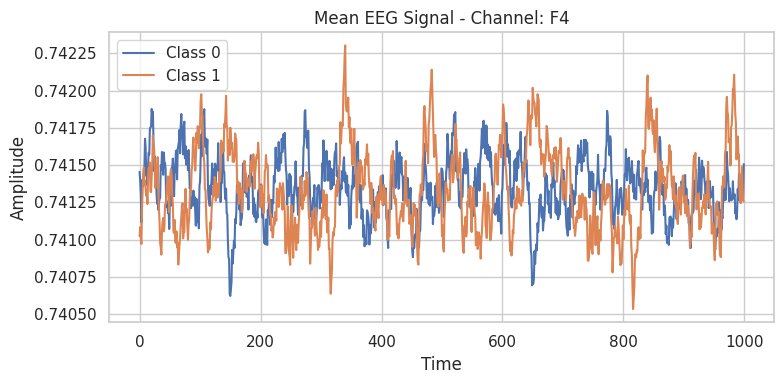

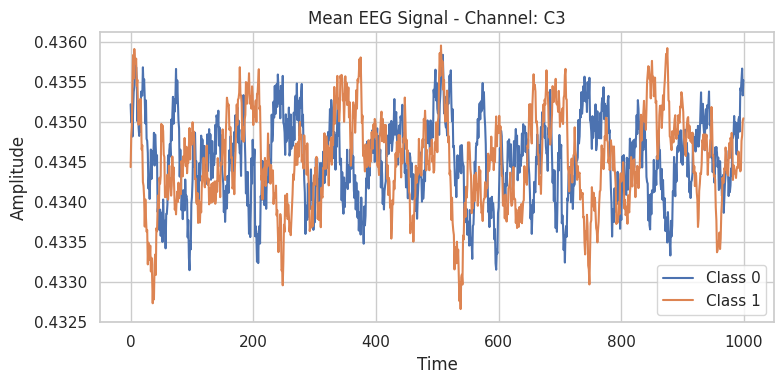

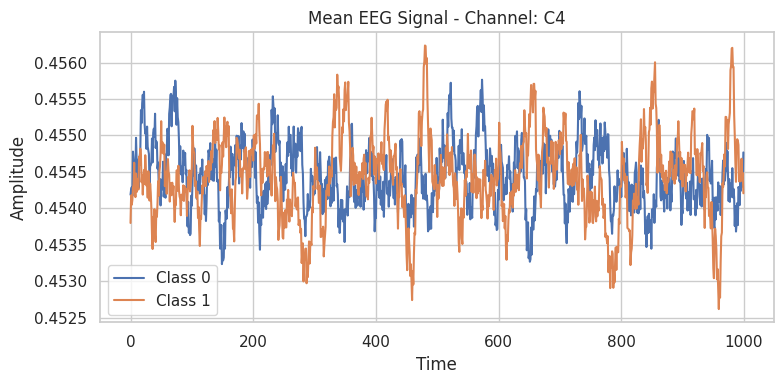

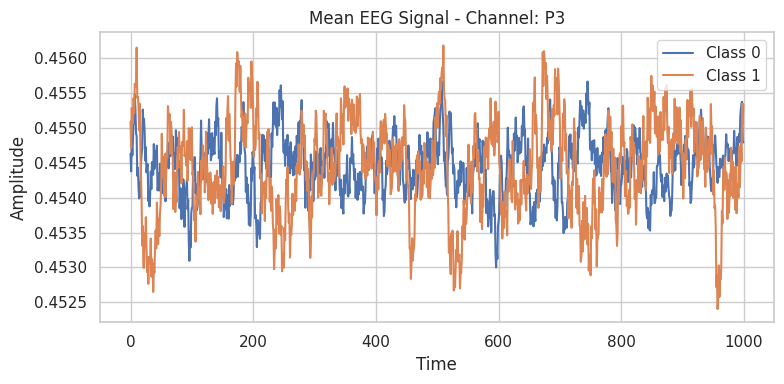

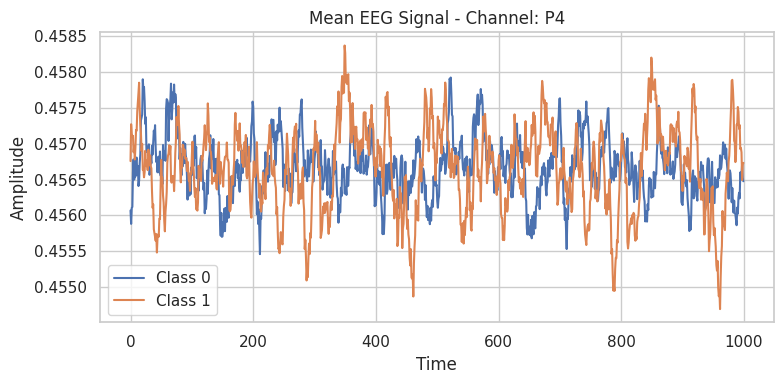

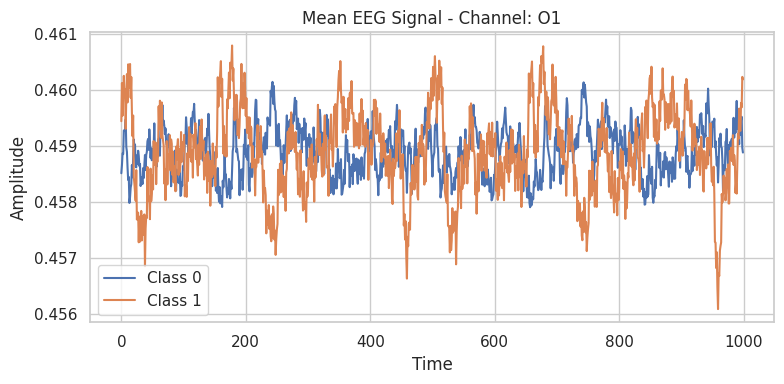

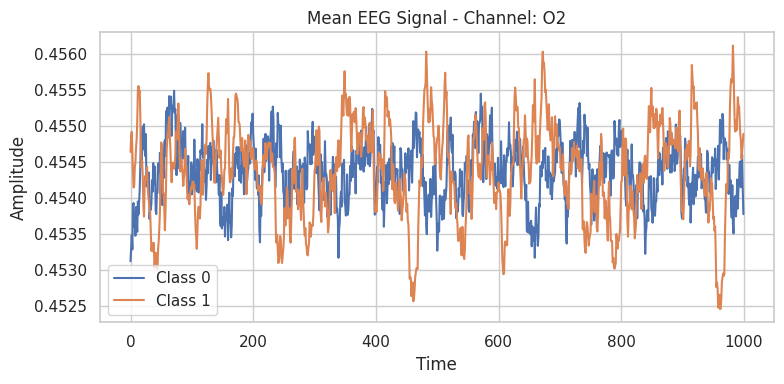

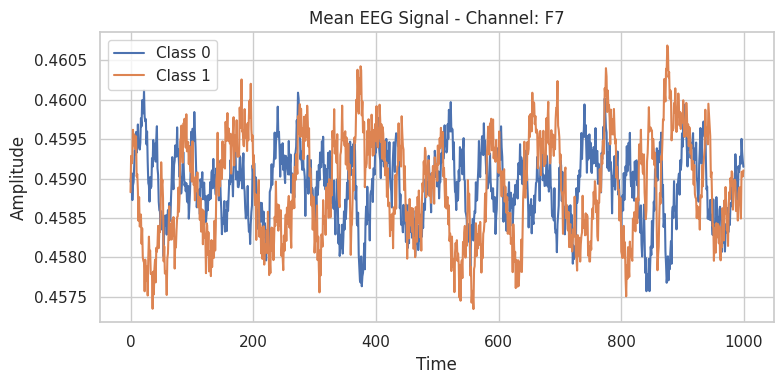

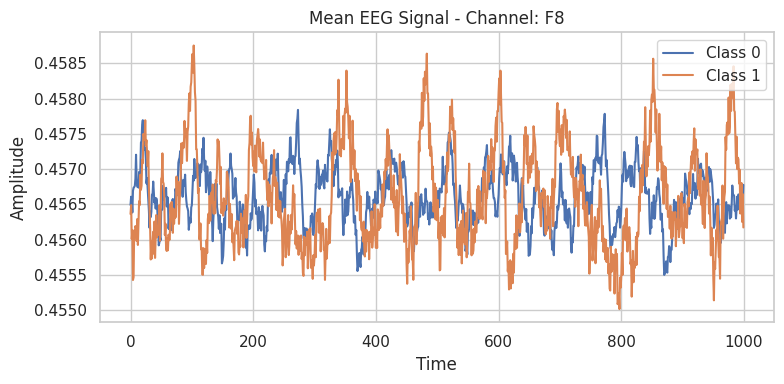

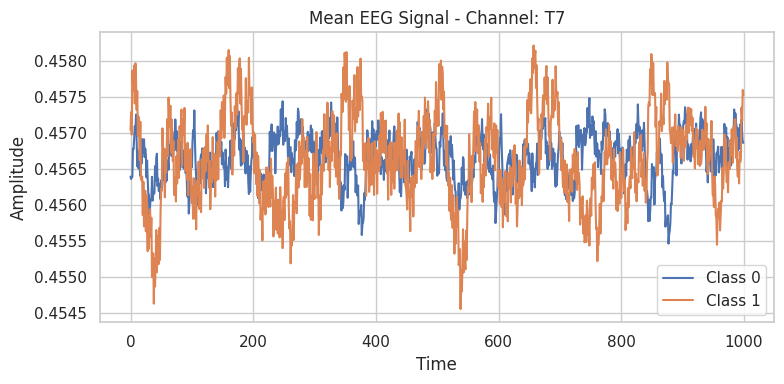

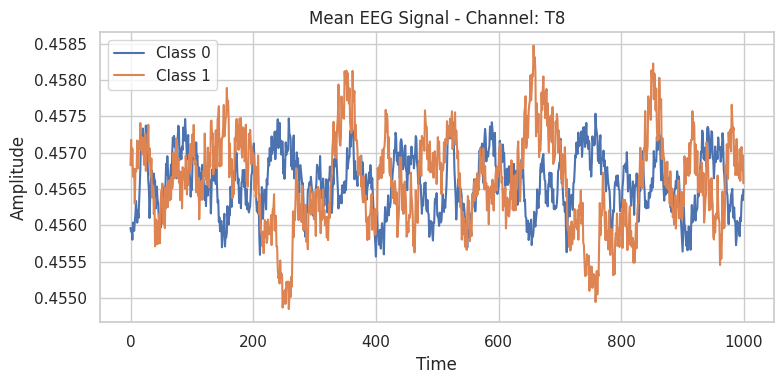

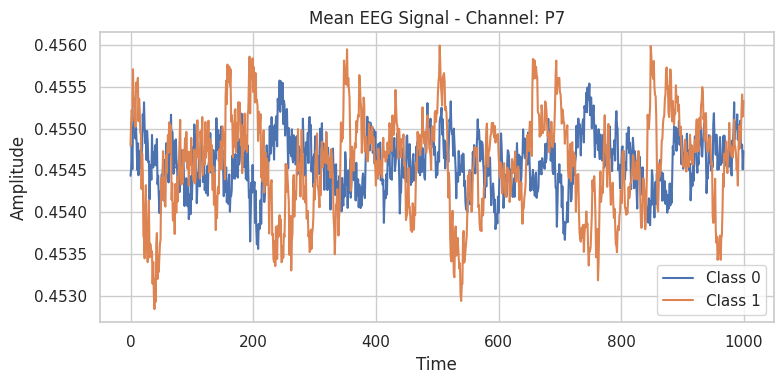

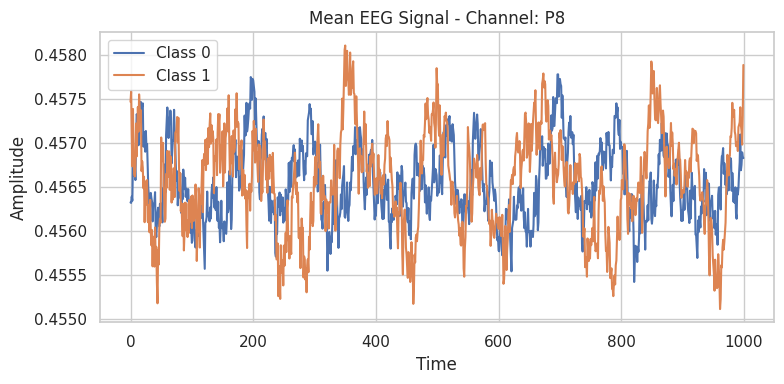

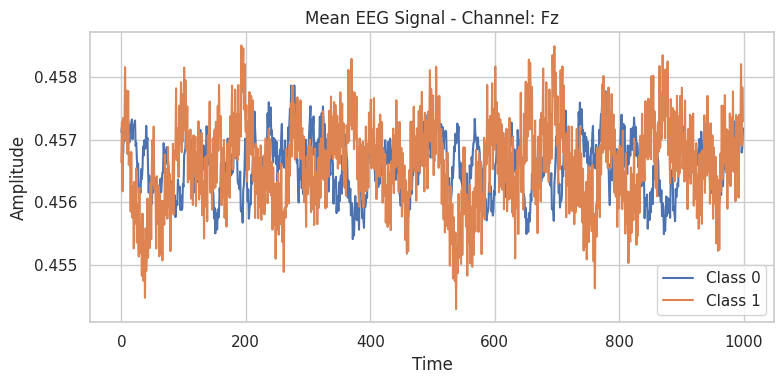

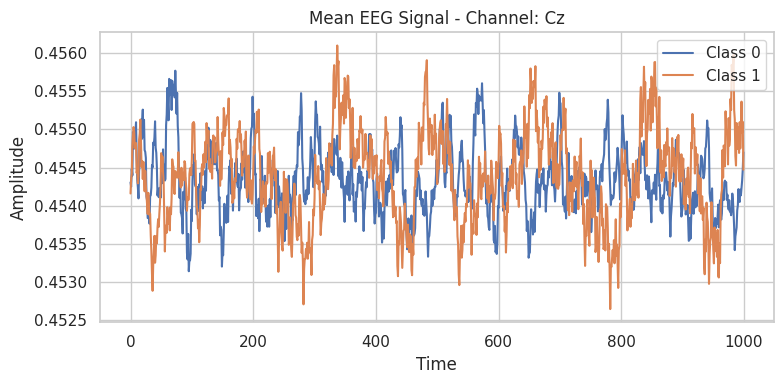

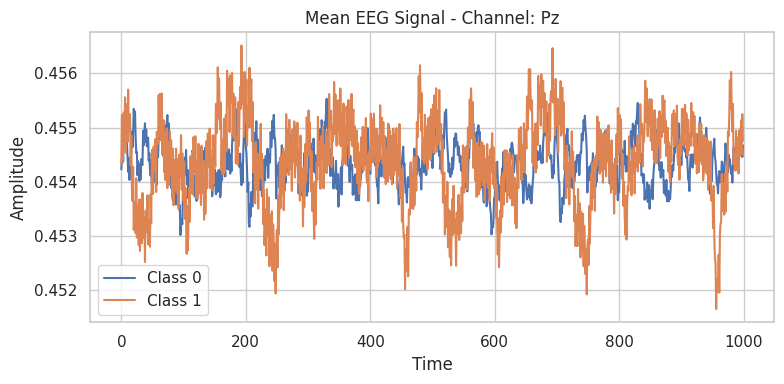

In [12]:
def plot_mean_signals(X, y, eeg_channels):
    class_labels = np.unique(y)
    time = np.arange(X.shape[1])
    
    for ch in range(X.shape[2]):
        plt.figure(figsize=(8, 4))
        for label in class_labels:
            mean_signal = np.mean(X[y == label, :, ch], axis=0)
            plt.plot(time, mean_signal, label=f'Class {label}')
        plt.title(f"Mean EEG Signal - Channel: {eeg_channels[ch]}")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_mean_signals(X, y, eeg_channels)


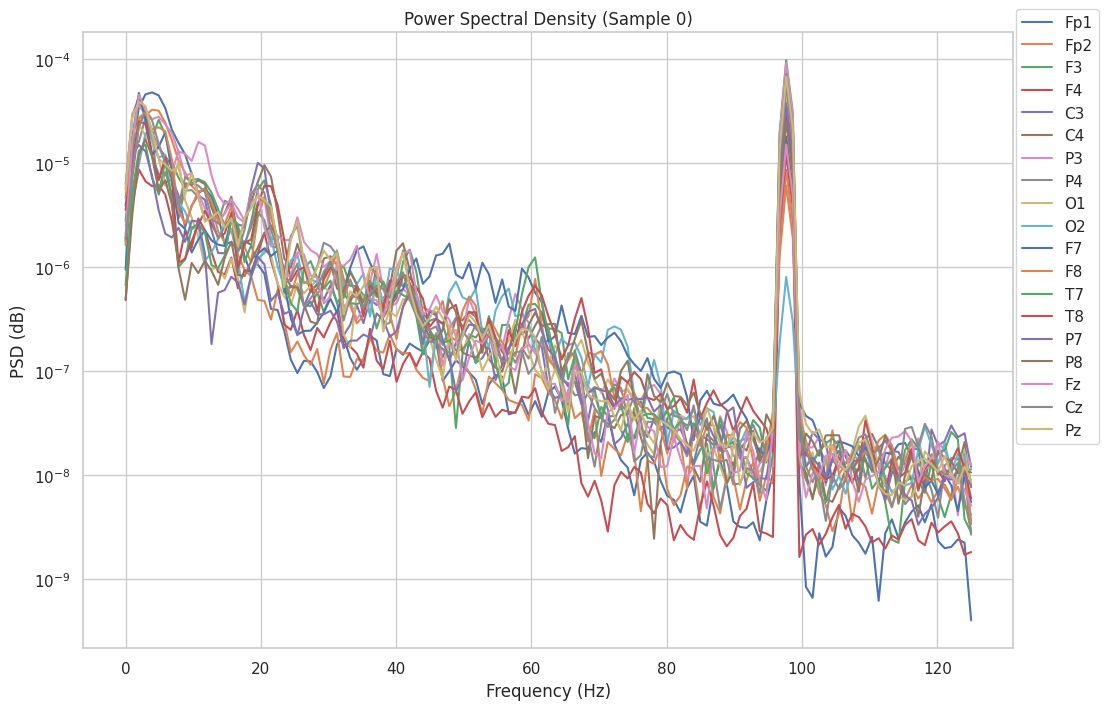

In [13]:
from scipy.signal import welch

def plot_psd(X, y, eeg_channels, sample_idx=0, sf=250):
    plt.figure(figsize=(12, 8))
    for i in range(X.shape[2]):
        freqs, psd = welch(X[sample_idx, :, i], sf)
        plt.semilogy(freqs, psd, label=eeg_channels[i])
    
    plt.title(f"Power Spectral Density (Sample {sample_idx})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("PSD (dB)")
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
    plt.grid(True)
    plt.show()

plot_psd(X, y, eeg_channels, sample_idx=0)


Phase 4

In [14]:
from scipy.stats import kurtosis, skew, entropy
from scipy.signal import welch
import pandas as pd
import numpy as np

In [15]:
def extract_features(X, sf=250):
    # sf = sampling frequency (Hz) – change if needed
    band_freqs = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
        'gamma': (30, 45)
    }

    all_features = []

    for sample in X:
        sample_features = []

        for ch in range(sample.shape[1]):  # For each channel
            signal = sample[:, ch]
            
            # Time-domain features
            mean_val = np.mean(signal)
            std_val = np.std(signal)
            skew_val = skew(signal)
            kurt_val = kurtosis(signal)
            ent = entropy(np.abs(signal))  # entropy on magnitude

            ch_features = [mean_val, std_val, skew_val, kurt_val, ent]

            # Frequency-domain: Power spectral density (Welch)
            freqs, psd = welch(signal, sf)
            for band, (low, high) in band_freqs.items():
                idx = np.logical_and(freqs >= low, freqs <= high)
                power = np.sum(psd[idx])
                ch_features.append(power)
            
            sample_features.extend(ch_features)

        all_features.append(sample_features)

    return pd.DataFrame(all_features)


In [16]:
# X from Phase 3 → shape (samples, timesteps, channels)
features_df = extract_features(X)

print("Extracted Features Shape:", features_df.shape)
features_df.head()

Extracted Features Shape: (4091, 190)


0         1         2          3         4         5         6    \
0  0.224537  0.019399  1.057888   6.859665  6.904096  0.000142  0.000116   
1  0.223150  0.013589  0.314762   6.440716  6.905902  0.000097  0.000079   
2  0.222974  0.011515  0.037553   8.931558  6.906416  0.000012  0.000005   
3  0.223699  0.011785  1.619844  12.574174  6.906398  0.000054  0.000040   
4  0.223556  0.014090  1.546707   7.684273  6.905821  0.000136  0.000061   

        7         8         9    ...       180       181       182       183  \
0  0.000036  0.000015  0.000002  ...  0.455065  0.017745 -0.020938 -0.105279   
1  0.000024  0.000017  0.000002  ...  0.455391  0.017664  0.170697  0.227642   
2  0.000003  0.000005  0.000002  ...  0.455235  0.017785  0.245990  0.219044   
3  0.000013  0.000008  0.000002  ...  0.455755  0.018466 -0.058312  0.003144   
4  0.000020  0.000009  0.000002  ...  0.455720  0.023077  0.946637  4.046970   

        184       185       186       187       188       189  
0  6.906994  0.000122  0.000039  0.000024  0.000041  0.000011  
1  6.907004  0.000087  0.000057  0.000031  0.000036  0.000015  
2  6.906994  0.000044  0.000061  0.000025  0.000042  0.000014  
3  6.906933  0.000049  0.000070  0.000058  0.000043  0.000011  
4  6.906490  0.000305  0.000109  0.000072  0.000057  0.000011  

[5 rows x 190 columns]

In [17]:
# Add label column
features_df['Label'] = y

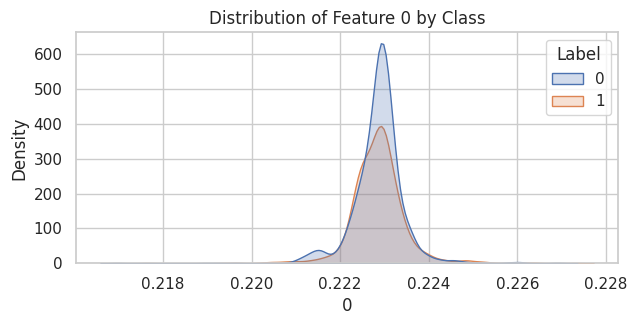

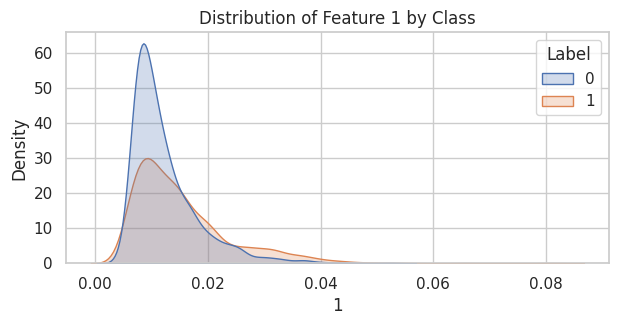

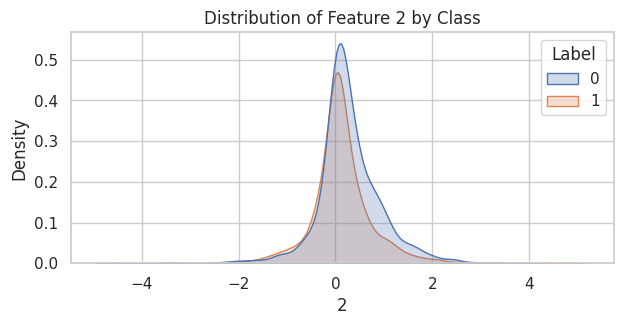

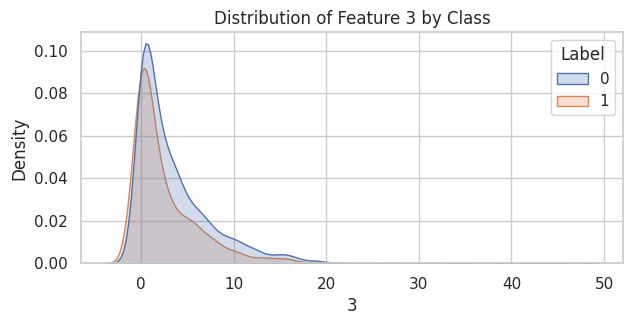

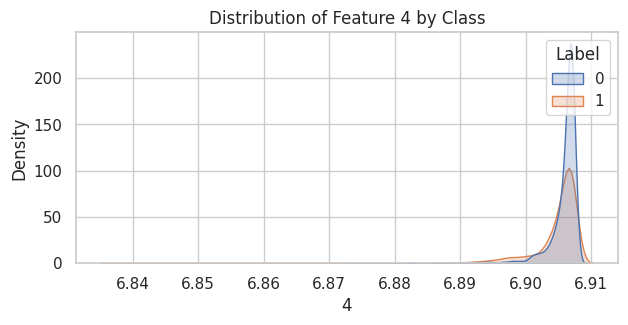

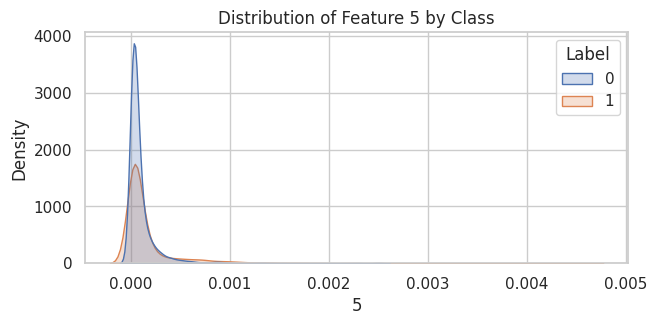

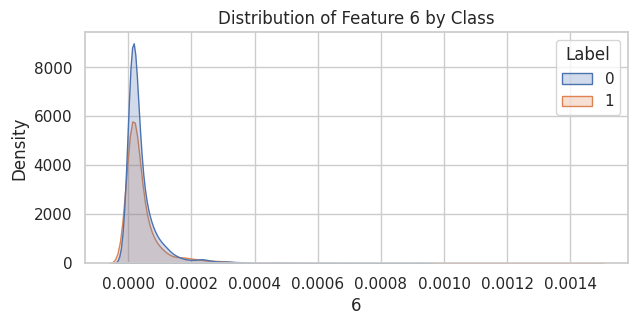

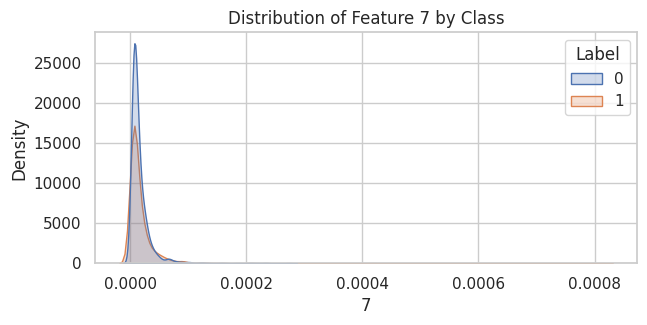

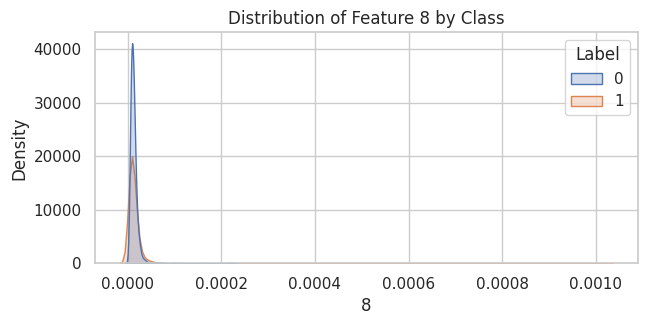

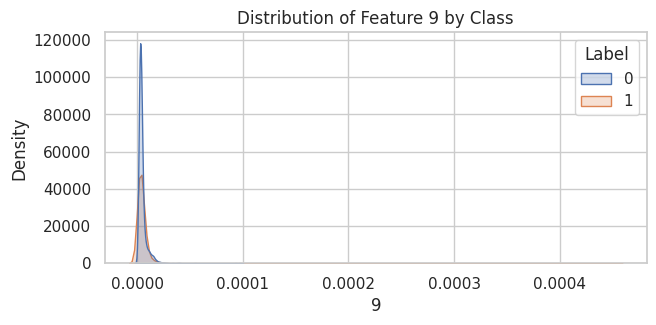

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for the first 10 features
for i in range(10):
    plt.figure(figsize=(7, 3))
    sns.kdeplot(data=features_df, x=features_df.columns[i], hue='Label', fill=True)
    plt.title(f"Distribution of Feature {i} by Class")
    plt.show()

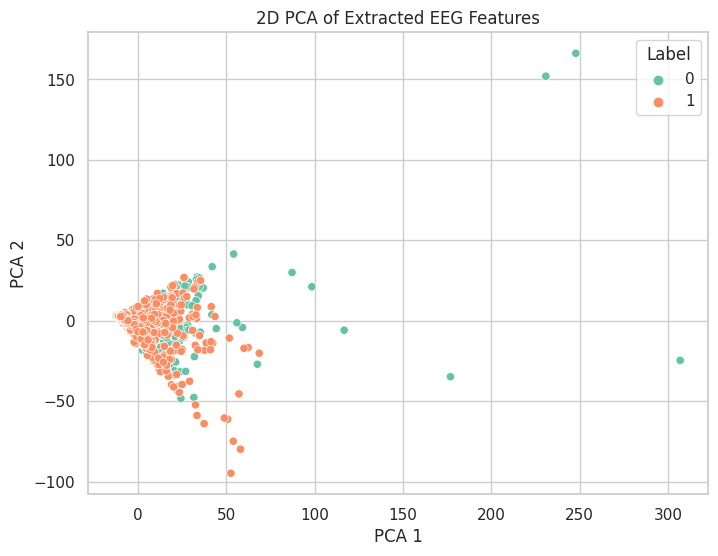

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_feats = pca.fit_transform(features_df.drop('Label', axis=1))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_feats[:, 0], y=pca_feats[:, 1], hue=features_df['Label'], palette='Set2')
plt.title("2D PCA of Extracted EEG Features")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


Phase 5

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Control = 0, ADHD = 1

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [23]:
def normalize_eeg(X):
    X_norm = np.zeros_like(X)
    for ch in range(X.shape[2]):
        ch_data = X[:, :, ch]
        mean = ch_data.mean()
        std = ch_data.std()
        X_norm[:, :, ch] = (ch_data - mean) / std
    return X_norm

X_train = normalize_eeg(X_train)
X_test = normalize_eeg(X_test)


In [24]:
import tensorflow as tf

X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

2025-04-10 14:46:52.534424: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-10 14:46:52.963370: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-10 14:46:54.490509: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64
2025-04-10 14:46:54.490645: W tensorflow/compiler/xla/stream_executor/p

In [25]:
batch_size = 64

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train_tf))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test_tf))
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [26]:
print("Train input shape:", X_train_tf.shape)  # (num_samples, timesteps, channels)

Train input shape: (3272, 1000, 19)


In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, BatchNormalization, Dropout,
    Bidirectional, LSTM, Dense, Attention, GlobalAveragePooling1D, Layer
)
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Custom Attention Layer (simple additive attention)
class AttentionLayer(Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super().build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)

# Input shape based on your X_train (timesteps, channels)
input_shape = X_train.shape[1:]
inputs = Input(shape=input_shape)

# 1D CNN for spatial features
x = Conv1D(64, kernel_size=5, padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

x = Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

# BiLSTM for sequential understanding
x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.3)(x)

# Attention Mechanism
x = AttentionLayer()(x)

# Dense layers
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1000, 19)]        0         
                                                                 
 conv1d_6 (Conv1D)           (None, 1000, 64)          6144      
                                                                 
 batch_normalization_6 (Batc  (None, 1000, 64)         256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 500, 64)          0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 500, 64)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 500, 128)          2470

In [57]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5)

history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=100,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/100


52/52 [==============================] - 8s 52ms/step - loss: 0.4477 - accuracy: 0.7995 - val_loss: 0.4829 - val_accuracy: 0.9170 - lr: 5.0000e-04
Epoch 2/100
52/52 [==============================] - 2s 38ms/step - loss: 0.1002 - accuracy: 0.9673 - val_loss: 0.3130 - val_accuracy: 0.8987 - lr: 5.0000e-04
Epoch 3/100
52/52 [==============================] - 2s 38ms/step - loss: 0.0526 - accuracy: 0.9844 - val_loss: 0.2337 - val_accuracy: 0.9304 - lr: 5.0000e-04
Epoch 4/100
52/52 [==============================] - 2s 44ms/step - loss: 0.0143 - accuracy: 0.9963 - val_loss: 0.0841 - val_accuracy: 0.9927 - lr: 5.0000e-04
Epoch 5/100
52/52 [==============================] - 2s 39ms/step - loss: 0.0096 - accuracy: 0.9972 - val_loss: 0.0277 - val_accuracy: 0.9976 - lr: 5.0000e-04
Epoch 6/100
52/52 [==============================] - 2s 39ms/step - loss: 0.0072 - accuracy: 0.9985 - val_loss: 0.0349 - val_accuracy: 0.9915 - lr: 5.0000e-04
Epoch 7/100
52/52 [==============================] - 2s 42

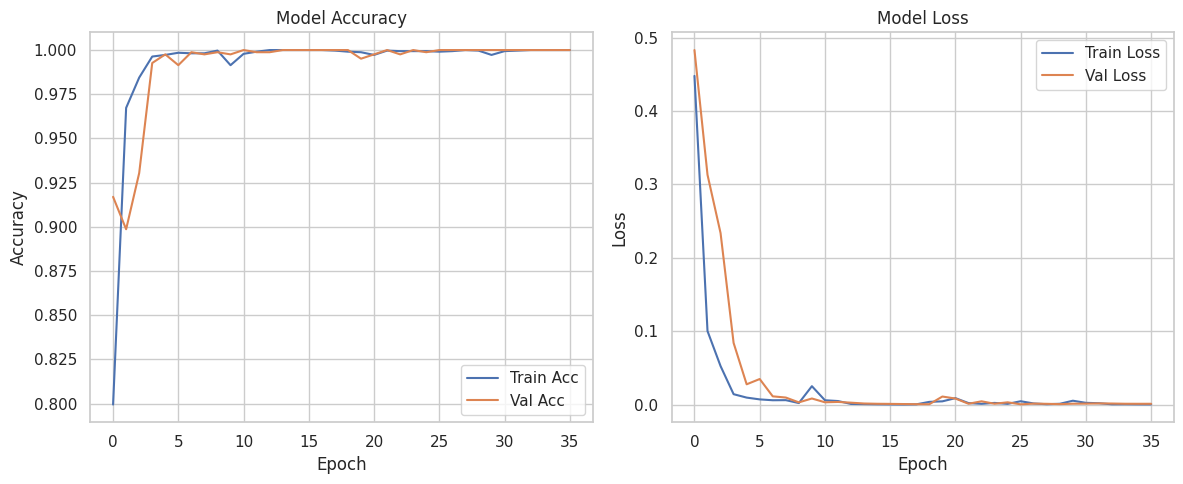

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [59]:
model.save("cnn_lstm_adhd_model_100_Percent_Accuracy.h5")
print("✅ cnn_lstm_adhd_model_100_Percent_Accuracy.h5")

✅ cnn_lstm_adhd_model_100_Percent_Accuracy.h5


Phase 7: Model Evaluation

In [60]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.4f}")

13/13 [==============================] - 1s 39ms/step - loss: 4.8173e-04 - accuracy: 1.0000
Test Accuracy: 1.0000


In [61]:
import numpy as np

y_pred_probs = model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test  # Original labels as array

13/13 [==============================] - 1s 17ms/step


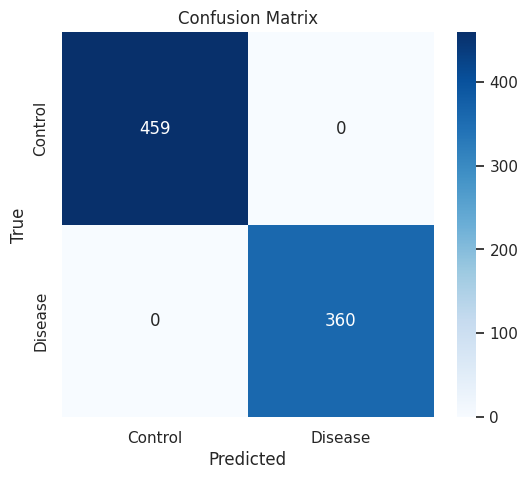

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true, y_pred)
class_names = ['Control', 'Disease']  # Replace with your actual class labels

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [63]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

     Control       1.00      1.00      1.00       459
     Disease       1.00      1.00      1.00       360

    accuracy                           1.00       819
   macro avg       1.00      1.00      1.00       819
weighted avg       1.00      1.00      1.00       819



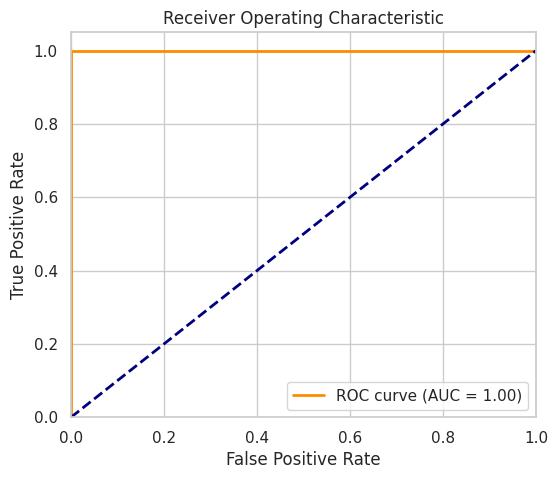

In [64]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Phase 8: Model Interpretation!

In [65]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Sample a test input for interpretation (shape: (1, time_steps, channels))
X_interp = X_test_tf[:1]

In [66]:
@tf.function
def interpolate_inputs(baseline, input, alphas):
    alphas_x = alphas[:, tf.newaxis, tf.newaxis]
    delta = input - baseline
    inputs = baseline + alphas_x * delta
    return inputs

def compute_integrated_gradients(model, baseline, input, m_steps=50):
    alphas = tf.linspace(0.0, 1.0, m_steps)
    interpolated = interpolate_inputs(baseline, input, alphas)

    with tf.GradientTape() as tape:
        tape.watch(interpolated)
        predictions = model(interpolated)
        target = predictions[:, tf.argmax(predictions[0])]

    grads = tape.gradient(target, interpolated)
    avg_grads = tf.reduce_mean(grads, axis=0)
    integrated_grads = (input - baseline) * avg_grads
    return integrated_grads

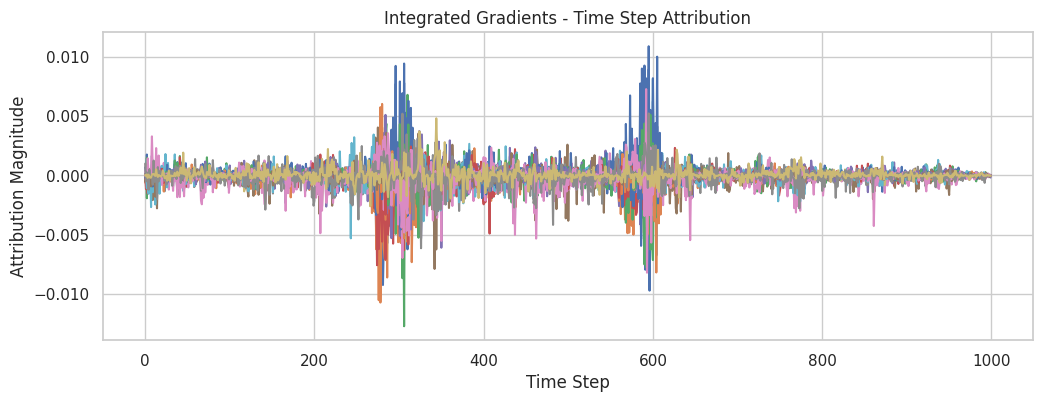

In [67]:
baseline = tf.zeros_like(X_interp)
ig_attributions = compute_integrated_gradients(model, baseline, X_interp)

# Visualize IG
plt.figure(figsize=(12, 4))
plt.plot(ig_attributions[0])
plt.title("Integrated Gradients - Time Step Attribution")
plt.xlabel("Time Step")
plt.ylabel("Attribution Magnitude")
plt.grid(True)
plt.show()

In [68]:
@tf.function
def compute_saliency_map(model, input):
    with tf.GradientTape() as tape:
        tape.watch(input)
        preds = model(input)
        class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]
    grads = tape.gradient(loss, input)
    return tf.abs(grads)

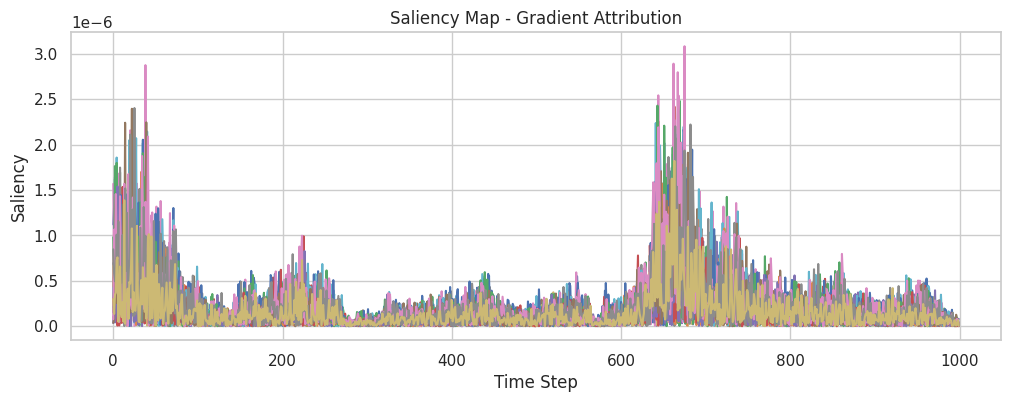

In [69]:
saliency = compute_saliency_map(model, X_interp)

plt.figure(figsize=(12, 4))
plt.plot(saliency[0])
plt.title("Saliency Map - Gradient Attribution")
plt.xlabel("Time Step")
plt.ylabel("Saliency")
plt.grid(True)
plt.show()

In [70]:
from tensorflow.keras.models import Model

# Define intermediate model: outputs from LSTM layer
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(index=6).output)

# Get feature embeddings (e.g., for t-SNE and heatmaps)
X_embed = intermediate_layer_model.predict(X_test_tf[:300])  # sample for speed
y_embed = y_test[:300]

10/10 [==============================] - 0s 16ms/step


In [71]:
X_embed =  X_embed.reshape(X_embed.shape[0], -1)

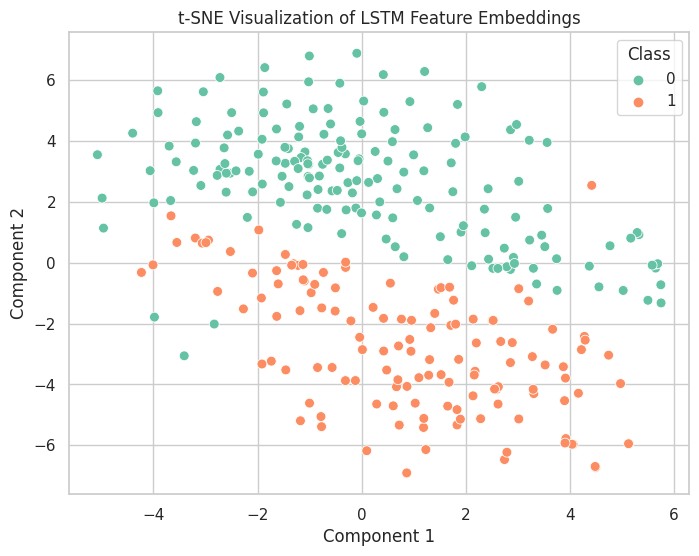

In [72]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_embed)

# Plot t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_embed, palette='Set2', s=50)
plt.title("t-SNE Visualization of LSTM Feature Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Class")
plt.grid(True)
plt.show()

In [73]:
# Saliency map for multiple test samples
def get_saliency_matrix(model, X_batch):
    with tf.GradientTape() as tape:
        tape.watch(X_batch)
        predictions = model(X_batch)
        class_indices = tf.argmax(predictions, axis=1)
        selected_preds = tf.reduce_sum(predictions * tf.one_hot(class_indices, depth=2), axis=1)
    grads = tape.gradient(selected_preds, X_batch)
    return tf.abs(grads).numpy()

# Compute saliency for a small batch
X_sample_batch = X_test_tf[:20]
saliency_matrix = get_saliency_matrix(model, X_sample_batch)
avg_saliency = np.mean(saliency_matrix, axis=0)  # shape: (timesteps, channels)

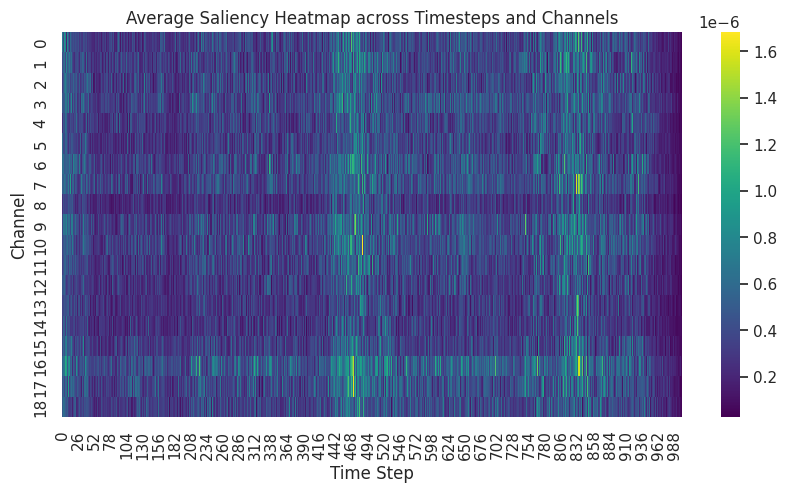

In [74]:
plt.figure(figsize=(10, 5))
sns.heatmap(avg_saliency.T, cmap='viridis', cbar=True)
plt.title("Average Saliency Heatmap across Timesteps and Channels")
plt.xlabel("Time Step")
plt.ylabel("Channel")
plt.show()

Phase 9: Advanced Interpretation + Evaluation Techniques

Journey of One Signal Through the Mode

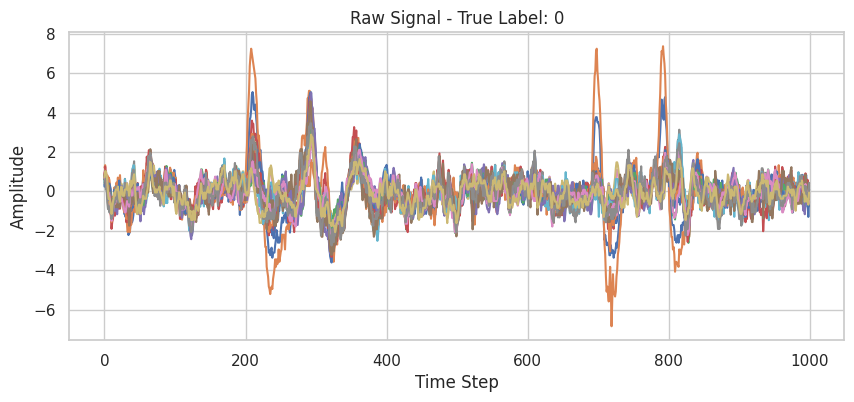

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Choose one test sample (say index 5)
index = 5
sample = X_test_tf[index:index+1]  # Keep batch dim
label = y_test_tf[index].numpy()

plt.figure(figsize=(10, 4))
plt.title(f"Raw Signal - True Label: {label}")
plt.plot(sample[0])
plt.xlabel("Time Step")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [76]:
# Predict
pred_proba = model.predict(sample)
predicted_class = np.argmax(pred_proba)

print(f"🔍 Predicted Class: {predicted_class}")
print(f"✅ True Label     : {label}")
print(f"📊 Confidence     : {pred_proba[0][predicted_class]:.4f}")

1/1 [==============================] - 0s 442ms/step
🔍 Predicted Class: 0
✅ True Label     : 0
📊 Confidence     : 1.0000


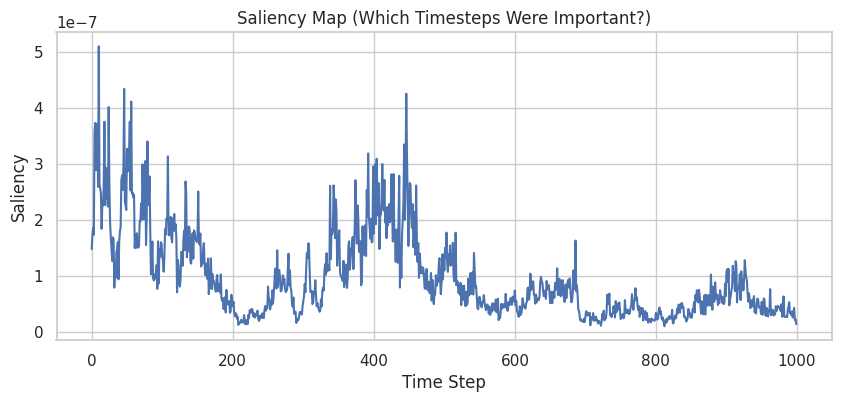

In [77]:
import tensorflow as tf

with tf.GradientTape() as tape:
    tape.watch(sample)
    prediction = model(sample)
    class_idx = tf.argmax(prediction[0])
    loss = prediction[0, class_idx]

grads = tape.gradient(loss, sample)
saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

# Plot saliency
plt.figure(figsize=(10, 4))
plt.title("Saliency Map (Which Timesteps Were Important?)")
plt.plot(saliency.numpy())
plt.xlabel("Time Step")
plt.ylabel("Saliency")
plt.grid(True)
plt.show()

In [79]:
# Extract LSTM layer output (correct name: 'lstm_4')
intermediate_model = tf.keras.Model(inputs=model.input,
                                    outputs=model.get_layer('lstm_3').output)

# Get LSTM output for a single sample
lstm_output = intermediate_model.predict(sample)

print("✅ LSTM Output Shape:", lstm_output.shape)
print("🔍 LSTM Output (first 5 values):", lstm_output[0][:5])

1/1 [==============================] - 4s 4s/step
✅ LSTM Output Shape: (1, 250, 64)
🔍 LSTM Output (first 5 values): [[ 7.56754726e-02 -1.59478649e-01 -1.25370666e-01 -2.12864920e-01
   2.33589783e-01 -4.09743994e-01 -1.38135210e-01 -2.24413145e-02
  -1.10934772e-01  3.45128104e-02  2.09220424e-01  2.01048069e-02
  -7.95502290e-02 -8.62686709e-03 -1.90900058e-01  7.16190692e-03
   2.07849294e-01  2.94124801e-02  1.53160766e-01  8.82476419e-02
   2.24297911e-01  1.97211862e-01  4.15040627e-02  5.21389544e-02
  -4.03809659e-02 -8.47824439e-02  9.93324891e-02 -9.91290286e-02
  -2.21696928e-01  4.48337849e-03 -3.24187547e-01 -3.44357379e-02
   1.85018659e-01  9.19155553e-02 -5.39574809e-02 -3.61803919e-01
   5.57064377e-02  1.20108752e-02 -9.25990716e-02 -2.58539151e-02
   1.53014868e-01  9.50932279e-02 -1.12116039e-02  5.06985746e-02
  -2.29264975e-01  1.52991507e-02  1.28472477e-01 -8.85242410e-03
   2.25465015e-01  7.31037706e-02 -1.65287867e-01 -1.65790915e-01
   5.28066531e-02  1.27796

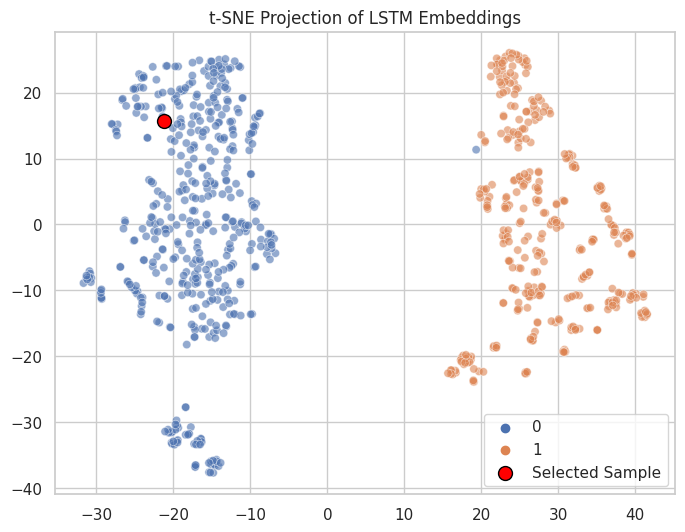

In [82]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce to 2D with t-SNE
avg_hidden_states = np.mean(lstm_outputs, axis=1)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
lstm_tsne = tsne.fit_transform(avg_hidden_states)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=lstm_tsne[:, 0], y=lstm_tsne[:, 1], hue=y_test, palette='deep', alpha=0.6)
plt.scatter(lstm_tsne[index, 0], lstm_tsne[index, 1], color='red', s=100, label='Selected Sample', edgecolor='black')
plt.title("t-SNE Projection of LSTM Embeddings")
plt.legend()
plt.grid(True)
plt.show()

In [83]:
print("🎯 Single Example Journey Summary")
print("---------------------------------")
print(f"True Label       : {label}")
print(f"Predicted Class  : {predicted_class}")
print(f"Prediction Prob  : {pred_proba[0][predicted_class]:.4f}")
print("Saliency map highlights key time steps.")
print("Position in LSTM feature space visualized via t-SNE.")

🎯 Single Example Journey Summary
---------------------------------
True Label       : 0
Predicted Class  : 0
Prediction Prob  : 1.0000
Saliency map highlights key time steps.
Position in LSTM feature space visualized via t-SNE.


Final

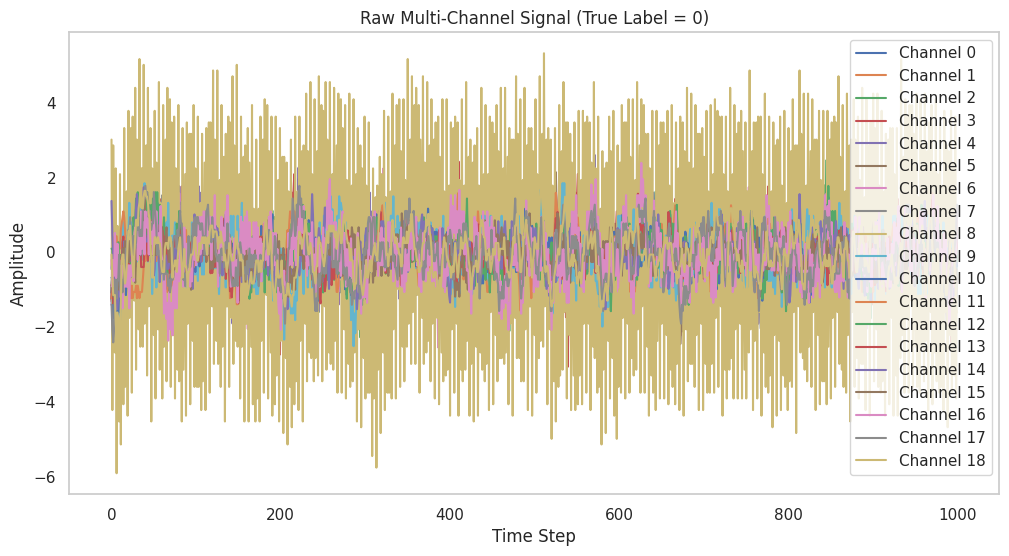

In [84]:
sample_idx = 42  # choose any sample
sample = X_test[sample_idx]
label = y_test[sample_idx]

plt.figure(figsize=(12, 6))
for i in range(sample.shape[1]):
    plt.plot(sample[:, i], label=f'Channel {i}')
plt.title(f"Raw Multi-Channel Signal (True Label = {label})")
plt.xlabel("Time Step")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

1/1 [==============================] - 0s 61ms/step


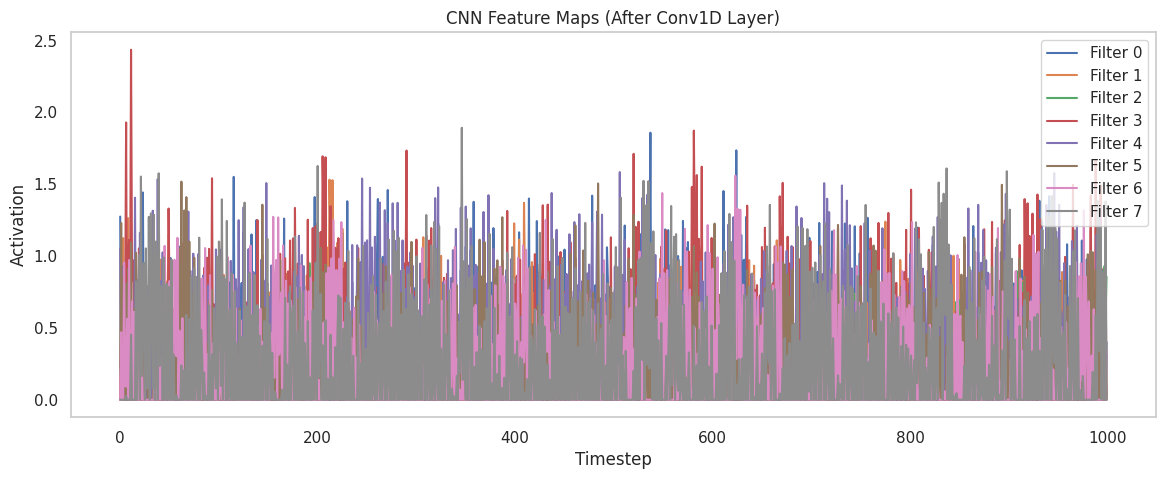

In [86]:
from tensorflow.keras.models import Model

# Create intermediate model to get conv outputs
conv_model = Model(inputs=model.input, outputs=model.get_layer('conv1d_6').output)
conv_output = conv_model.predict(X_test_tf[sample_idx:sample_idx+1])[0]

plt.figure(figsize=(14, 5))
for i in range(min(8, conv_output.shape[-1])):  # show first 8 filters
    plt.plot(conv_output[:, i], label=f'Filter {i}')
plt.title("CNN Feature Maps (After Conv1D Layer)")
plt.xlabel("Timestep")
plt.ylabel("Activation")
plt.legend()
plt.grid()
plt.show()

1/1 [==============================] - 0s 296ms/step


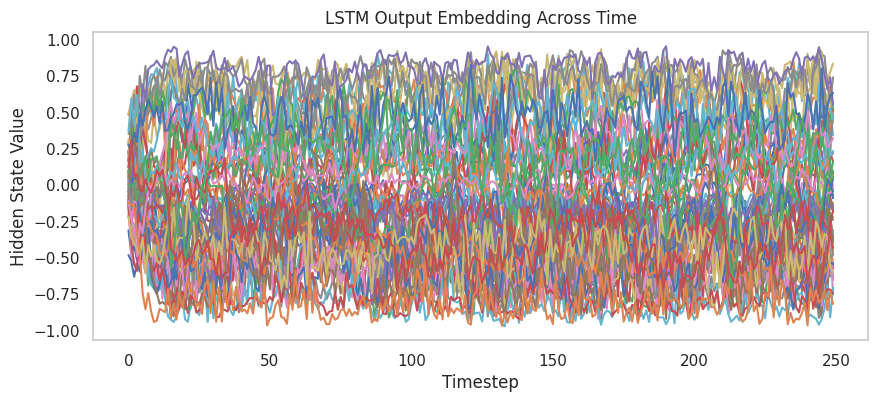

In [87]:
lstm_layer = [l for l in model.layers if 'lstm' in l.name][0]
lstm_model = Model(inputs=model.input, outputs=lstm_layer.output)
lstm_embedding = lstm_model.predict(X_test_tf[sample_idx:sample_idx+1])[0]

plt.figure(figsize=(10, 4))
plt.plot(lstm_embedding)
plt.title("LSTM Output Embedding Across Time")
plt.xlabel("Timestep")
plt.ylabel("Hidden State Value")
plt.grid()
plt.show()

1/1 [==============================] - 0s 36ms/step


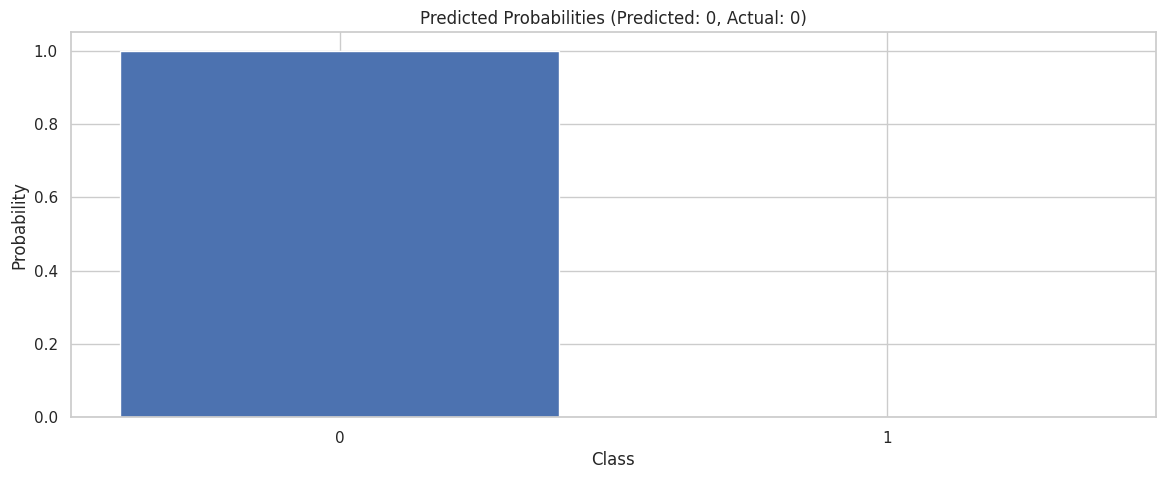

In [88]:
pred = model.predict(X_test_tf[sample_idx:sample_idx+1])[0]
pred_class = np.argmax(pred)

plt.bar(range(len(pred)), pred)
plt.xticks(range(len(pred)))
plt.title(f"Predicted Probabilities (Predicted: {pred_class}, Actual: {label})")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

New Novel Method - Trying it

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       459
           1       0.76      0.58      0.66       360

    accuracy                           0.73       819
   macro avg       0.74      0.72      0.72       819
weighted avg       0.74      0.73      0.73       819

✅ Accuracy: 73.38%


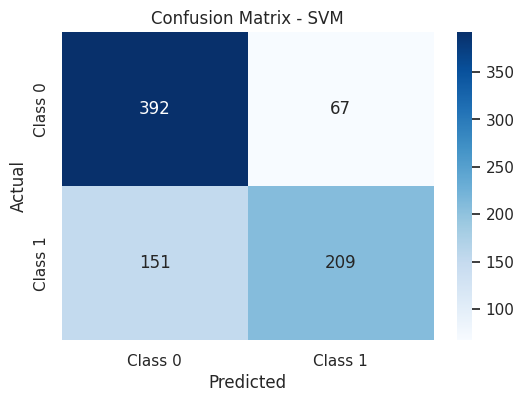

In [89]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Flatten the input if it's multidimensional (e.g., from CNN input)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Step 2: Create SVM pipeline (with Standard Scaler)
svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
)

# Step 3: Train
svm_pipeline.fit(X_train_flat, y_train)

# Step 4: Predict
y_pred = svm_pipeline.predict(X_test_flat)

# Step 5: Evaluation
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc * 100:.2f}%")

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()